## BMI Calculator Workflow

For Reference -> https://www.calculatorsoup.com/calculators/health/bmi-calculator.php

In [11]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
# define state
class BMIState(TypedDict):
    weight_pounds:int
    height_inches:int
    bmi:float
    category:str


In [3]:
def calculate_bmi(state: BMIState) -> BMIState:

    weight = state['weight_pounds']
    height = state['height_inches']

    bmi = weight/(height**2)*703

    state['bmi'] = round(bmi, 2)

    return state

In [4]:
def label_bmi(state: BMIState) -> BMIState:

    bmi = state['bmi']

    if bmi < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state["category"] = "Normal"
    elif 25 <= bmi < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"

    return state

In [5]:
# define your graph
graph = StateGraph(BMIState)

# add nodes to your graph
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label_bmi', label_bmi)

# add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label_bmi')
graph.add_edge('label_bmi', END)

# compile the graph
workflow = graph.compile()


In [6]:
# execute the graph
intial_state = {'weight_pounds':170, 'height_inches':70}

final_state = workflow.invoke(intial_state)

print(final_state)

{'weight_pounds': 170, 'height_inches': 70, 'bmi': 24.39, 'category': 'Normal'}


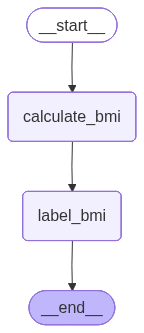

In [7]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())